## Análise de dados experimentais

Baixe o arquivo `galaxias.txt`. Esse arquivo contém uma tabela com dados de algumas galáxias observadas pelo [SDSS](https://www.sdss.org/). A tabela consiste num arrays de 18525 linhas por 5 colunas. Cada linha representa uma galáxia, e cada coluna uma informação diferente.

0. magnitude absoluta na banda $g$: $M_g$
1. magnitude absoluta na banda $r$: $M_r$
2. magnitude aparente na banda $r$: $m_r$
3. redshift (desvio para o vermelho): $z$
4. índice de concentração na band $r$: $\mathrm{CI}_r$

Podemos ler essa tabela usando a função `numpy.genfromtxt()`.

In [57]:
import numpy as np

t = np.genfromtxt('galaxias.txt')


Separarando o array `t` em 5 arrays unidimensionais, um com cada coluna.

In [60]:
Mg = t[:, 0]  # Primeira coluna: Magnitude absoluta na banda g
Mr = t[:, 1]  # Segunda coluna: Magnitude absoluta na banda r
mr = t[:, 2]  # Terceira coluna: Magnitude aparente na banda r
z = t[:, 3]   # Quarta coluna: Redshift
CI = t[:, 4]  # Quinta coluna: Índice de concentração

print("Primeiras linhas de cada array:")
print("Mg:", Mg[:5])
print("Mr:", Mr[:5])
print("mr:", mr[:5])
print("z:", z[:5])
print("CI:", CI[:5])

Primeiras linhas de cada array:
Mg: [-19.45281982 -15.32320023 -19.14567947 -18.7317791  -21.07209969]
Mr: [-20.14122009 -15.51601982 -19.99023056 -19.12965012 -21.80050087]
mr: [14.70627022 15.73775959 16.93116951 15.74880981 17.13698959]
z: [0.0213136 0.0041461 0.0525431 0.0217158 0.122869 ]
CI: [2.87760997 1.92665005 2.54942989 2.46293998 3.27460003]


O redshift $z$ é, segundo a lei de Hubble-Lemaître, proporcional à distância da galáxia. A magnitude aparente é o logaritmo do brilho aparente de uma galáxia, numa escala negativa, em um determinado filtro. Isto é,

$$
m_\nu = -2.5 \log F_\nu + C.
$$

Quanto menor o número, mais brilhante é o objeto. Vamos selecionar uma amostra limitada em distância e brilho aparente, para ficar com galáxias próximas e mais brilhantes. Criamos uma máscara de seleção (um array com valores booleanos) com os critérios: $z < 0.1$ e $m_r < 17$.

In [63]:
# Aplicar os critérios de seleção: z < 0.1 e mr < 17
mask = (z < 0.1) & (mr < 17)

# Filtrar os dados com base na máscara
filtered_Mg = Mg[mask]
filtered_Mr = Mr[mask]
filtered_mr = mr[mask]
filtered_z = z[mask]
filtered_CI = CI[mask]

# Calcular a magnitude aparente m_ν usando a equação fornecida

# A constante C pode ser definida para ajustar a escala, por enquanto vamos assumir C = 0
C = 0
m_nu = -2.5 * np.log10(10**(-0.4 * filtered_mr)) + C  # Relacionando com mr para calcular m_ν

# Exibir as primeiras linhas dos dados filtrados e calculados
print("Primeiras linhas dos dados filtrados:")
print("Mg:", filtered_Mg[:5])
print("Mr:", filtered_Mr[:5])
print("mr:", filtered_mr[:5])
print("z:", filtered_z[:5])
print("CI:", filtered_CI[:5])
print("Magnitude aparente calculada m_ν:", m_nu[:5])


Primeiras linhas dos dados filtrados:
Mg: [-19.45281982 -15.32320023 -19.14567947 -18.7317791  -15.05955982]
Mr: [-20.14122009 -15.51601982 -19.99023056 -19.12965012 -15.42940044]
mr: [14.70627022 15.73775959 16.93116951 15.74880981 16.84905052]
z: [0.0213136 0.0041461 0.0525431 0.0217158 0.0066123]
CI: [2.87760997 1.92665005 2.54942989 2.46293998 2.57083988]
Magnitude aparente calculada m_ν: [14.70627022 15.73775959 16.93116951 15.74880981 16.84905052]


O gráfico de $(M_g - M_r) \times M_r$ desta amostra. Aqui vamos usar magnitudes absolutas, isto é, relacionadas ao brilho intrínseco das galáxias, descontando o termo que cai com o quadrado da distância. Como estão em log, $(M_g - M_r)$ é porporcional à razão de fluxos nos filtros $g$ (azul-verde) e $r$ (vermelho). Esta diferença quer dizer: quão mais brilhante a galáxia é no filtro $g$ em relação ao filtro $r$. Portanto, $(M_g - M_r)$ codifica uma cor.

Assim, esse é um diagrama de cor em função do brilho intrínseco. Limites recomendados para o gráfico: $-24 \leq M_r \leq -17$ e $0 \leq (M_g - M_r) \leq 1$.

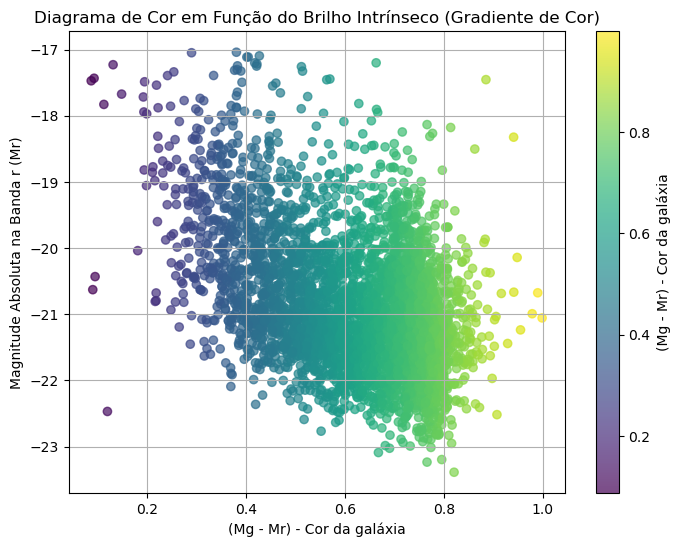

In [66]:
import matplotlib.pyplot as plt

# Filtrar os dados com base nos limites de M_r e (M_g - M_r)
mask_limits = (filtered_Mr >= -24) & (filtered_Mr <= -17) & (filtered_Mg - filtered_Mr >= 0) & (filtered_Mg - filtered_Mr <= 1)

# Filtrar os dados com base na máscara
filtered_Mg_limited = filtered_Mg[mask_limits]
filtered_Mr_limited = filtered_Mr[mask_limits]
filtered_mg_mr = filtered_Mg_limited - filtered_Mr_limited

# Plotar o gráfico com gradiente de cor
plt.figure(figsize=(8,6))

# Utilizar o valor de (Mg - Mr) para mapear as cores
scatter = plt.scatter(filtered_mg_mr, filtered_Mr_limited, c=filtered_mg_mr, cmap='viridis', alpha=0.7)

# Adicionar barra de cores para indicar a escala de cor
plt.colorbar(scatter, label='(Mg - Mr) - Cor da galáxia')

# Adicionar legendas e labels
plt.xlabel('(Mg - Mr) - Cor da galáxia')
plt.ylabel('Magnitude Absoluta na Banda r (Mr)')
plt.title('Diagrama de Cor em Função do Brilho Intrínseco (Gradiente de Cor)')
plt.grid(True)
plt.show()


Repare que há um acúmulo de galáxias na parte superior e uma conjunto mais difuso abaixo. Esse grupo mais acima tem cor mais avermelhada, e é chamado de *sequência vermelha*. O outro grupo abaixo é chamado de *núvem azul*. São galáxias de características diferentes: tipicamente, as vemelhas são elípticas e as azuis são espirais.

Podemos diferenciar as duas usando o índice de concentração $\mathrm{CI}_r$, que mede quanto da luz da galáxia está concentrada no seu núcleo. Galáxias espirais têm $\mathrm{CI}_r < 2.5$, enquanto as elípticas têm $\mathrm{CI}_r > 2.5$. Façamos máscaras para escolher esses dois tipos de galáxias, e então dois scatterplots no mesmo gráfico, cada um com uma cor diferente.

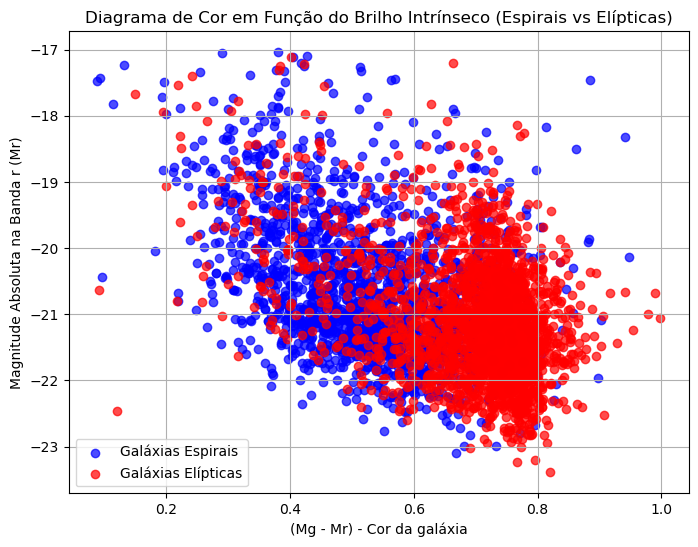

In [68]:

# Filtrar as variáveis com base em mask_limits
filtered_Mg_limited = filtered_Mg[mask_limits]
filtered_Mr_limited = filtered_Mr[mask_limits]
filtered_mg_mr = filtered_Mg_limited - filtered_Mr_limited
filtered_CI_limited = filtered_CI[mask_limits]

# Criar as máscaras para as galáxias espirais (CI <= 2.5) e elípticas (CI > 2.5)
spiral_mask = filtered_CI_limited <= 2.5
elliptical_mask = filtered_CI_limited > 2.5

# Plotar o gráfico
plt.figure(figsize=(8,6))

# Scatterplot para galáxias espirais
plt.scatter(filtered_mg_mr[spiral_mask], filtered_Mr_limited[spiral_mask], 
            c='blue', label='Galáxias Espirais', alpha=0.7)

# Scatterplot para galáxias elípticas
plt.scatter(filtered_mg_mr[elliptical_mask], filtered_Mr_limited[elliptical_mask], 
            c='red', label='Galáxias Elípticas', alpha=0.7)

# Adicionar legendas e labels
plt.xlabel('(Mg - Mr) - Cor da galáxia')
plt.ylabel('Magnitude Absoluta na Banda r (Mr)')
plt.title('Diagrama de Cor em Função do Brilho Intrínseco (Espirais vs Elípticas)')
plt.legend()
plt.grid(True)
plt.show()
